# Causality versus Association

As scientists, we are often looking for patterns or relations between variables. When there exists a pattern between two variables, we call this an *association*[^*]. For example, time of day is associated with the traffic on Chicago's Lake Shore Drive and temperature outside is associated with the number of people at Lake Michigan.

When we see that two variables *X* and *Y* are associated, we often wonder if one causes the other. There are 3 possible scenarios:

* **Causation**: change in *X* causes change in *Y* (or vice-versa)
* **Common response** (confounding): some other variable *Z* causes change in both *X* and *Y*
* **Common outcome** (colliding): changes in both *X* and *Y* cause change in some variable *Z*

Well-designed studies, which we will discuss further in the next section, can help distinguish between the three scenarios which are often depicted using causal graphs. A *causal graph* is a graph where each node depicts a variable and each edge is directed (an arrow) pointing in the direction of a cause. The figure below shows causal graphs as well as examples for all three scenarios.

```{figure} ./causality.png
---
align: center
---
Three Types of Association
```

The first panel above shows a *causal association*. When we see a causal association between *X* and *Y* we can depict it with an arrow from the cause to the effect. For example jumping in the lake is the direct cause of getting wet so the arrow is drawn from jumping in the lake to getting wet.

A common example of a causal association is a *linear* association or a line. For example, consider the equation for a line $y=2x$. This is an example where changes in $x$ are direct *causes* of changes in $y$. We can see this association by plotting $x$ vs $y$ in a scatterplot as we saw in Chapter (add vizualization chapter number).

The following code can be used to make such a scatterplot. First, we import our usual modules and set a random seed as you saw in Chapter 9. Also in Chapter 9, you were introduced to the `random.choice` function from the `numpy` module. That function chooses a value at random from list of potential choices. For our simulation below, we use a similar function `random.normal`. This function chooses values at random from a normal distribution, which we will discuss in more detail in later chapters. We use this function to choose 100 random values to make up our `x` array. Then we define `y` to be $2x$ plus random noise (simulating error and natural variation that exists in the real world) added using our `random.normal` function and make a scatterplot.

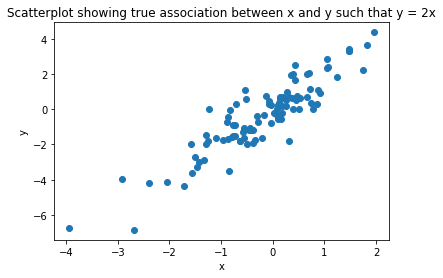

In [3]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt

np.random.seed(1890)

x = np.random.normal(size = 100)
y = 2 * x + np.random.normal(size = 100)

plt.scatter(x, y)
plt.title("Scatterplot showing true association between x and y such that y = 2x")
plt.ylabel('y')
plt.xlabel('x')
plt.show()

This scatterplot depicts a true association between x and y that is present due to the way we definied y to depend on x.

The second panel of the causal graph figure shows a false association between *X* and *Y* (the dotted line) that is present due to a *confounding* variable, *Z*. *Conditioning on* a confounding variable is best practice to remove the false association between *X* and *Y*. Conditioning on a variable means looking at only one value of the conditioned variable. For example: suppose we have a dataset that contains information about beach events. We plot ice cream sales and shark attacks and see that there is a positive association such that as ice cream sales increase so do shark attacks. Should we conclude that ice cream attracts sharks? Thinking more deeply about the problem, we realize that shark attacks increase when the weather is warm because there are more people in the ocean. Ice cream sales also increase during warm weather, therefore both variables have a common cause, weather. When we condition on weather and only consider ice cream sales and shark attacks in the summer months, the association disappears.

Let's use scatterplots as we did earlier to better understand confounding. We create our confounding variable `z` as an array of 100 random values. Next, we define both `x` and `y` to depend explicitly on `z`. When we make the scatterplot, we see an association appear between `x` and `y`. However, when we look at the equations for `x` and `y`, there is no true association (the equation for `x` does not depend on `y` and vice versa). The association in the scatterplot is not causal, it is due to the counfounding variable `z`.

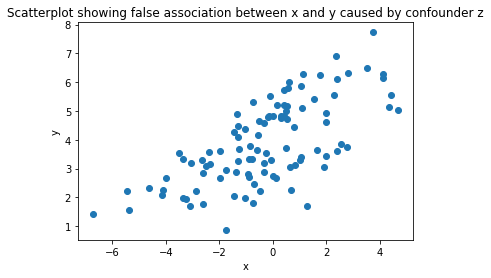

In [4]:
z = np.random.normal(size = 100)
x = 2 * z + np.random.normal(size = 100)
y = z + 4 + np.random.normal(size = 100)

plt.scatter(x, y)
plt.title("Scatterplot showing false association between x and y caused by confounder z")
plt.ylabel('y')
plt.xlabel('x')
plt.show()

The last panel of the causal graph figure depicts an association between *X* and *Y* is due to the *collider* variable, *Z*. We see false associations between two variables *X* and *Y* when both are causes of a third variable *Z* and we are conditioning on *Z*[^**]. For example: looking only at hospitalized patient data (conditioning on being hospitalized), we see a negative association between diabetes and heart disease such that those who have diabetes are less likely to have heart disease. However, it is known that diabetes is a risk factor of heart disease – having diabetes makes you more likely to develop heart disease – so we should see the opposite effect. This reversal in association occurs because we are only looking at hospitalized patients and both heart disease and diabetes are causes of hospitalization. Diabetes increases likelihood of heart disease and likelihood of hospitalization. Heart disease increases likelihood of hospitalization as well. If you are hopitalized for diabetes, it is less likely you also have heart disease. Therefore, those with diabetes in this sample of hospitalized patients have lower incidence of heart disease than those with diabetes in the general population, reversing the association between diabetes and heart disease.

Since colliding is a difficult concept to grasp, consider another example. Suppose your friend is complaining about a recent date. The person she went to dinner with was very good-looking but had no sense of humor. Your friend comments that it seems all good-looking people have a bad sense of humor. You know that in reality looks and humor are not related. Your friend is conditioning on a collider by considering only people that she dates. She likely only dates people that meet a certain threshold of looks and humor. Those that are very good-looking don't need to have as good of a sense of humor to get a date whereas those who are less good-looking must have a better sense of humor. This creates a negative association between looks and humor that does not exist outside of her dating pool.

We can use a scatterplot to understand colliding as well. We create `x` as an array of 100 random values between 0 and 1, this time from a uniform distribution. Imagine these to be probabilities of getting Disease X. We consider those who have probability greater than 50% to have developed the disease. Define `y` to be related to `x` such that those who have Disease X ($x > 0.5$) have twice as high of a score on Measure Y. Next, we define our collider `z` to depend on both `x` and `y`. When we make a scatterplot of `x` and `y`, we see the true association appear between `x` and `y`.

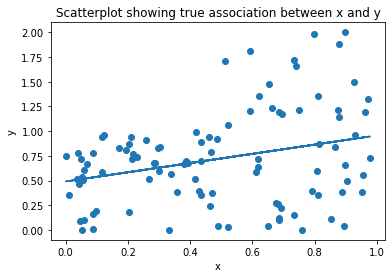

In [37]:
import pandas as pd

np.random.seed(312)

x = np.random.uniform(0, 1, size = 100)
y = (np.round(x+1))*np.random.uniform(0, 1, size = 100)
z = x + y

plt.scatter(x, y)
plt.title("Scatterplot showing true association between x and y")
plt.ylabel('y')
plt.xlabel('x')
c = np.polyfit(x, y, 1)
p = np.poly1d(c)
plt.plot(x, p(x), "-")
plt.show()

However, when we condition on values of our collider by plotting only values of `x` and y for which `z` is greater than 2 (those who have high probability of disease), we see the association between `x` and `y` change directions and appear to be negative.

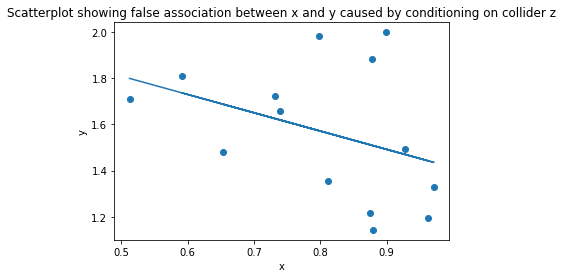

In [38]:
dat = pd.DataFrame({'X':x, 'Y':y, 'Z':z})

smallz = dat[dat['Z'] > 2]

plt.scatter(smallz.X, smallz.Y)
plt.title("Scatterplot showing false association between x and y caused by conditioning on collider z")
plt.ylabel('y')
plt.xlabel('x')
c = np.polyfit(smallz.X, smallz.Y, 1)
p = np.poly1d(c)
plt.plot(smallz.X, p(smallz.X), "-")
plt.show()


[^*]: An association is often referred to as a correlation. Correlations are discussed in more detail in Chapter 17.
[^**]: A more thorough discussion of colliders is beyond the scope of this book, but interested readers are referred to *The Book of Why* by Judea Pearl and Dana Mackenzie.